# UCI Wine Quality Assessment
### Predicting quality of white wine given 11 physiochemical attributes
### (https://www.kaggle.com/c/uci-wine-quality-dataset/data)

### Dataset Information

We have 2 datsets:

winequality-data.csv - Training data (all attributes, and corresponding quality) ; 3918 rows X 13 columns

winequality-solution-input.csv - Test data (attributes only) ; 980 rows X 13 columns

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Objective
The goal is to predict the quality given those physicochemical attributes. Only the white wine dataset is used here.

### Data fields
#### Input/Feature variables (based on physicochemical tests): 

1.  fixed acidity 
2.  volatile acidity 
3.  citric acid 
4.  residual sugar 
5.  chlorides 
6.  free sulfur dioxide 
7.  total sulfur dioxide
8.  density 
9.  pH 
10. sulphates 
11. alcohol

#### Output/Target variable (based on sensory data): 

quality (score between 0 (very bad) and 10 (very excellent))

#### Other:

id (unique ID for each sample, needed for submission)

## Import Libraries

In [26]:
#Data Processing Libraries
import numpy as np
import pandas as pd
from scipy.stats import norm

#Data Vizuaization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model import LinearRegression # Multiple linear regression
from sklearn.preprocessing import PolynomialFeatures # Polynomial Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression
from sklearn.svm import SVR  #Support Vector Machines

#Model Evaluation
from sklearn.metrics import r2_score # Best possible score is 1
from sklearn.metrics import explained_variance_score # Best possible score is 1.0, lower values are worse.
from sklearn.metrics import mean_absolute_error # Best possible score is 0
from sklearn.metrics import mean_squared_error # Best possible score is 0
from sklearn.metrics import mean_squared_log_error # Best possible score is 0
from sklearn.metrics import median_absolute_error # Best possible score is 0

## Get Data

In [3]:
data_train = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Github_Portfolio\\Data Science and Machine Learning\\data\\winequality-data.csv')
data_test = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Github_Portfolio\\Data Science and Machine Learning\\data\\winequality-solution-input.csv')

## Performing Descriptive Statistics

### Taking first peek into the data structure

In [4]:
print('Train data Shape -->' , data_train.shape)
print('Test data Shape -->' , data_test.shape)

Train data Shape --> (3918, 13)
Test data Shape --> (980, 12)


Test data set has 1 column less which is the "quality" column that we have to predict based on the training datset

In [5]:
data_train.head() # Fetching top 5 rows

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [6]:
data_train = data_train.drop(axis=0, columns='id') # Dropped the "id" column (unique ID for each sample)
data_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


### Assess Data Quality & Missing Values

In [7]:
# Assess missing values in Training dataset
print("Assess missing values in Training dataset")
data_train.isnull().sum()

Assess missing values in Training dataset


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Assess missing values in Test dataset
print("Assess missing values in Test dataset")
data_test.isnull().sum()

Assess missing values in Test dataset


fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
id                      0
dtype: int64

#### There is no missing data in any columns of train and test dataset!

### Univariate Analysis

In [9]:
data_train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000


#### Observations:

1. Counts are same of all column. So there is no missing data
2. Residual Sugar (5.1) , free_sulphur_dioxide (17.15) , total_sulfur_dioxide (42.98) have high standard deviation. A high standard deviation indicates that the data points are spread out over a wider range of values.
3. Residual Sugar (Min - 0.6 ; Max - 65.8)  , free_sulphur_dioxide(Min - 3 , Max - 289)  and total_sulphur_dioxide(Min - 9 , Max - 440). We will do a box plot for have a better view of these data

We will see the data distribution of each column in next section

### Data distribution for each fields

We will use histogram to check the data distribution

[]

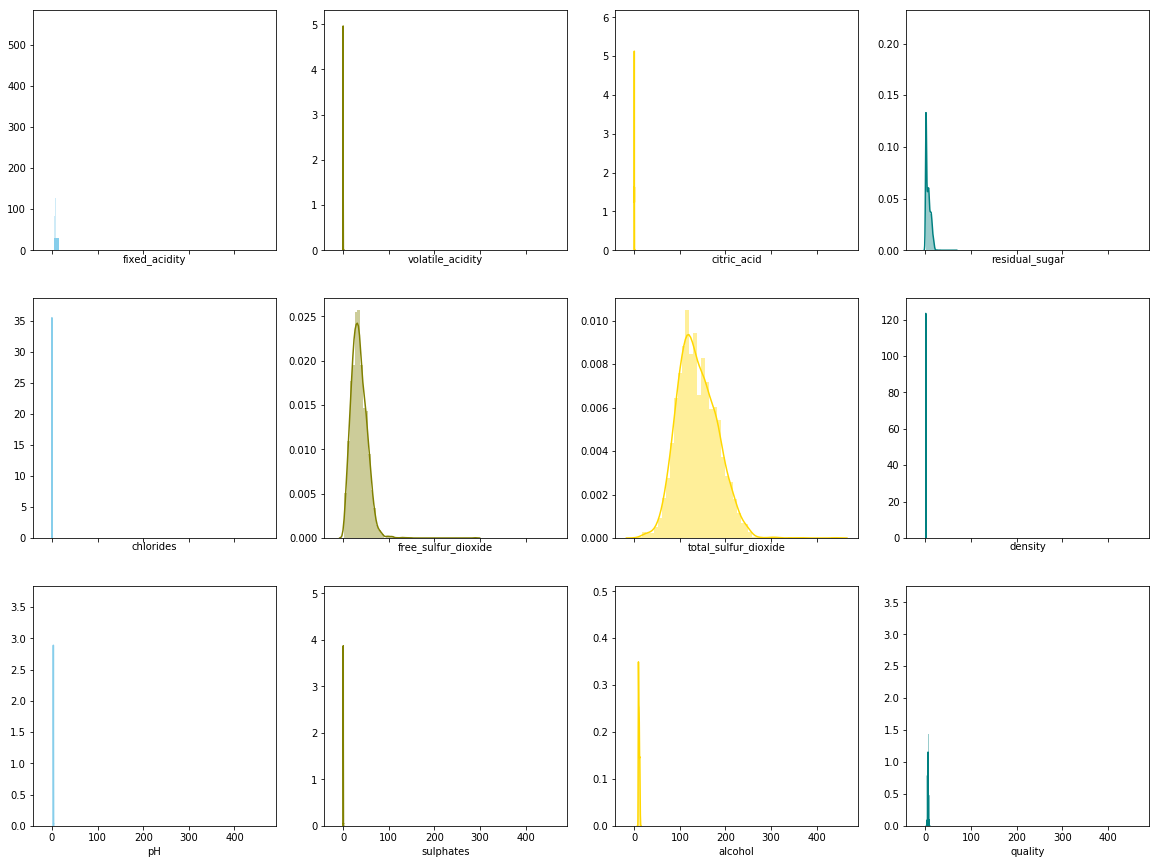

In [11]:
f, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True)
sns.distplot( data_train["fixed_acidity"] , kde=False, rug=True, color="skyblue", ax=axes[0, 0])
sns.distplot( data_train["volatile_acidity"] , color="olive", ax=axes[0, 1])
sns.distplot( data_train["citric_acid"] , color="gold", ax=axes[0, 2])
sns.distplot( data_train["residual_sugar"] , color="teal", ax=axes[0, 3])

sns.distplot( data_train["chlorides"] , color="skyblue", ax=axes[1, 0])
sns.distplot( data_train["free_sulfur_dioxide"] , color="olive", ax=axes[1, 1])
sns.distplot( data_train["total_sulfur_dioxide"] , color="gold", ax=axes[1, 2])
sns.distplot( data_train["density"] , color="teal", ax=axes[1, 3])

sns.distplot( data_train["pH"] , color="skyblue", ax=axes[2, 0])
sns.distplot( data_train["sulphates"] , color="olive", ax=axes[2, 1])
sns.distplot( data_train["alcohol"] , color="gold", ax=axes[2, 2])
sns.distplot( data_train["quality"] , color="teal", ax=axes[2, 3])
plt.plot()


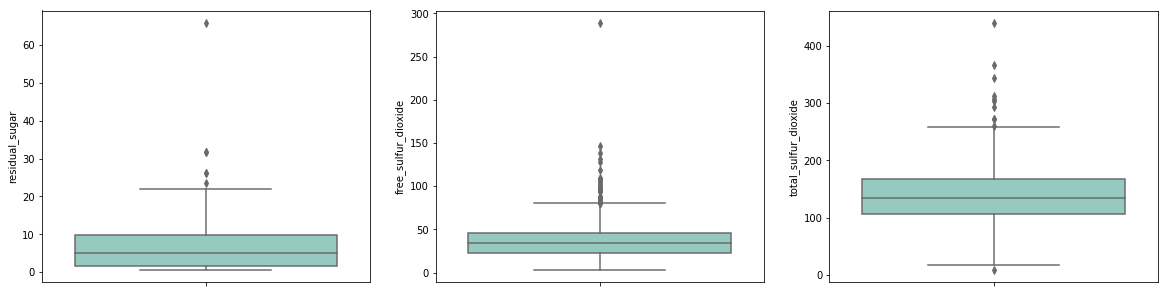

In [62]:
f, axes = plt.subplots(1,3 , figsize=(20, 5), sharex=True)
sns.boxplot(x=data_train["residual_sugar"] , orient="v", palette="Set3",ax=axes[0])
sns.boxplot(x=data_train["free_sulfur_dioxide"] , orient="v", palette="Set3",ax=axes[1])
sns.boxplot(x=data_train["total_sulfur_dioxide"] , orient="v", palette="Set3",ax=axes[2])
plt.show()

### Bi-Variate Analysis by vizualizing the data by computing pairwise correlation of columns

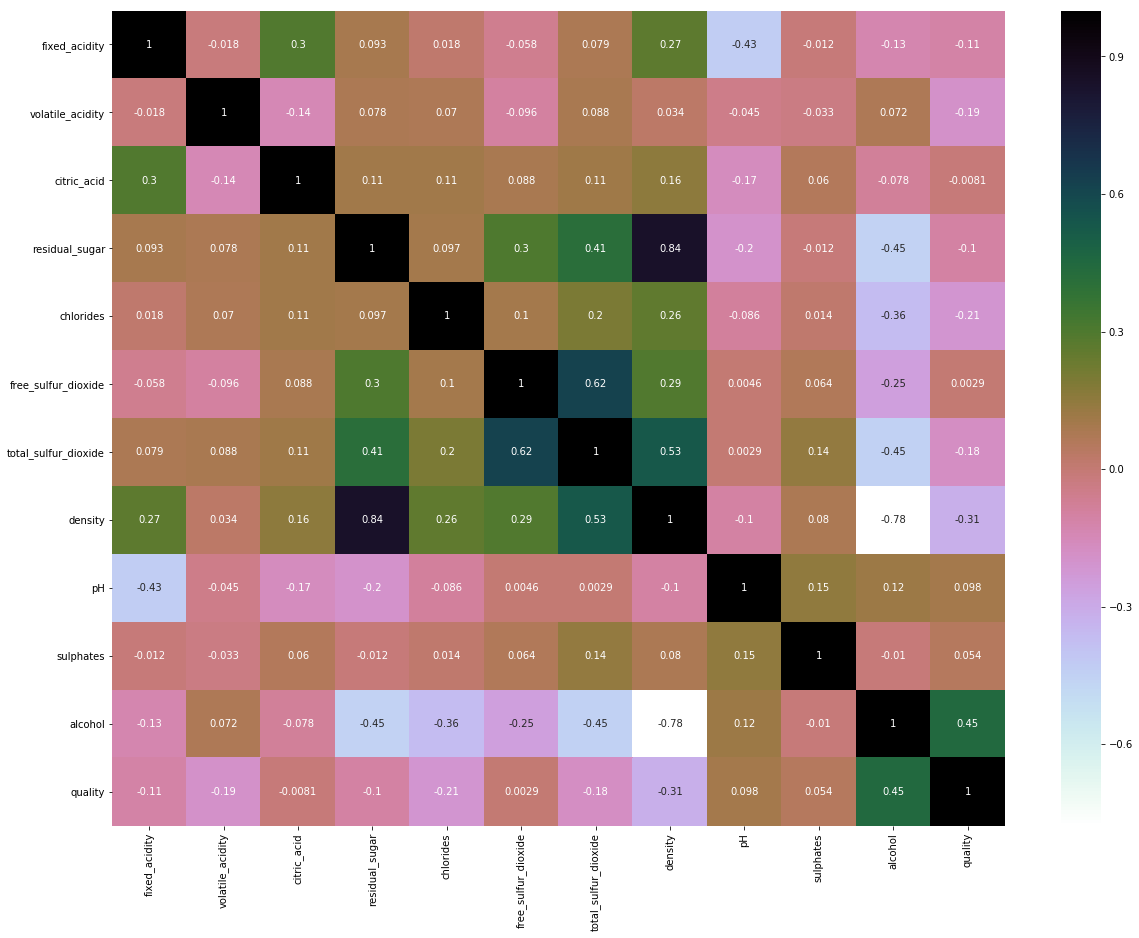

In [39]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data_train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

#### Observations:

1. density & residual_sugar are highly co-realted (r=0.84)
2. free_suphur_dioxide and total_sulphur_dioxide are positively co-realted (r=0.64)
3. total_sulphur_dioxide and density are positively co-realted (r=0.53)
4. alcohol & quality are positively co-realted (r=0.45)

### Getting columns into X (feature variable) and y(target variable)¶

In [15]:
#Assign Feature and Target Variable
X = data_train.iloc[:,0:11].values
y = data_train.iloc[:,11].values

### Dividing the dataset into test & train
#### test_size=0.25 will slice the data in such a way that 25% of data will be copied to the test variable and 75% to train variable

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 2742 samples in the training set and 1176 samples in the test set


### Next we will call the regressor, fit the model and predict the outcome

In [43]:
# Calling the regression function. We will use multiple linear regression

regression_model = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
regressor_model_list= []
regressor_accuracy_test = []
regressor_accuracy_train = []
regressor_accuracy_average = []

for regressor_list in regression_model:
    regressor = regressor_list
    
    # Fitting the training set into regression model
    regressor.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = regressor.predict(X_test) 
    score_test = r2_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = regressor.predict(X_train) 
    score_train = r2_score(y_train, y_pred_train)

    #Keeping the model and accuracy score into a list
    regressor_model_list.append(regressor_list.__class__.__name__)
    regressor_accuracy_test.append(round(score_test,4))
    regressor_accuracy_train.append(round(score_train,4))
    regressor_accuracy_average.append((score_test + score_train)/2)
    
#Creating pandas dataframe with Model and corresponding accuracy
accuracy_df = pd.DataFrame({'Model':regressor_model_list , 'Test Accuracy':regressor_accuracy_test, 'Train Accuracy' :regressor_accuracy_train , 'Average_Accuracy' :regressor_accuracy_average},index=None)

# Sorting the data with highest accuracy in the top
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True)

# Arranging the dataframe columns
accuracy_df = accuracy_df[['Model', 'Test Accuracy', 'Train Accuracy', 'Average_Accuracy']]
print(accuracy_df )

                   Model  Test Accuracy  Train Accuracy  Average_Accuracy
3  RandomForestRegressor         0.4096          0.8963          0.652933
1                    SVR         0.2588          0.7729          0.515886
2  DecisionTreeRegressor         0.0216          1.0000          0.510816
0       LinearRegression         0.3084          0.2833          0.295887
